In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
#import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = "WGFIbCGBMARQUxxiuzdyouuc6"
consumerSecret = "RwwUwMsU5DBuuI3uOYoiaPlb9ttk8sj2SQoQy6uJJ6geeptZdm"
accessToken = "329717340-8F5cj8DtQrTvYCXA2bDsXqnfd4BCiwUJfdqs1TW8"
accessTokenSecret = "yHv2QSckVufGOTzd5HLfI1rRFeRDf5zJr4PLavDq3saTS"

try:
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    api = tweepy.API(auth)#, wait_on_rate_limit=True, sleep_on_rate_limit=False)
    print("Authentication successful")
except:
    print("Error: Authentication Failed")

Authentication successful


In [3]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
#noOfTweet = int(input ("Please enter how many tweets to analyze: "))
noOfTweet=900
q=keyword+" AND #JPM AND JPMorgan Chase & Co. since:2015-01-01 until:2022-06-24"
tweets = tweepy.Cursor(api.search_tweets, q=keyword,lang='en').items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
#print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  jpm


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  900
positive number:  420
negative number:  181
neutral number:  299


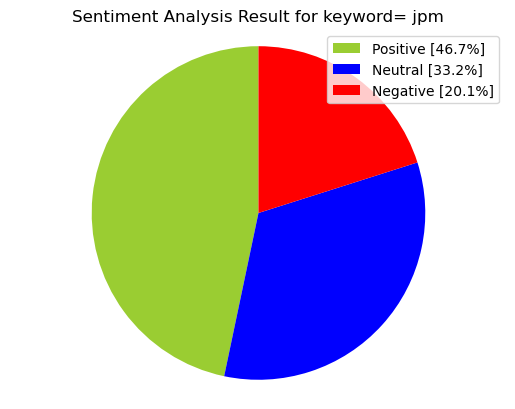

In [6]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [7]:
tweet_list

,0
0,@JPM_72 yeh no one is laughing hehehe im still...
1,RT @HerzlKarim: 2021 Securities sold yet not p...
2,RT @HerzlKarim: 2021 Securities sold yet not p...
3,RT @HerzlKarim: 2021 Securities sold yet not p...
4,RT @HerzlKarim: 2021 Securities sold yet not p...
...,...
895,RT @CrystalRacing: 2003 HUNGARY\n\nIt's Alonso...
896,Stock: $JPM - \n*** REALTIME TREND ***\nSELL\n...
897,RT @seemaikaran: King💥💥 #Ajithkumar𓃵 #AK61 ht...
898,@Convertbond GS: 💰\nJPM: 🐳\nDB: ☠️\nCS: 🤡


In [8]:
#Cleaning Tweets to Analyse Sentiment
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0
0,@JPM_72 yeh no one is laughing hehehe im still...
1,RT @HerzlKarim: 2021 Securities sold yet not p...
6,RT @unusual_whales: The SEC has charged JPMorg...
9,"JPMorgan Chase &amp; Co. (JPM) Stock Quotes, N..."
10,RT @megalott_global: #MegaLott Presale on #Pin...
...,...
895,RT @CrystalRacing: 2003 HUNGARY\n\nIt's Alonso...
896,Stock: $JPM - \n*** REALTIME TREND ***\nSELL\n...
897,RT @seemaikaran: King💥💥 #Ajithkumar𓃵 #AK61 ht...
898,@Convertbond GS: 💰\nJPM: 🐳\nDB: ☠️\nCS: 🤡


In [9]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub('(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)
tw_list

,0,text
0,@JPM_72 yeh no one is laughing hehehe im still...,72 yeh no one is laughing hehehe im still lmfao
1,RT @HerzlKarim: 2021 Securities sold yet not p...,2021 securities sold yet not purchased bofa...
6,RT @unusual_whales: The SEC has charged JPMorg...,the sec has charged jpmorgan jpm ubs and ...
9,"JPMorgan Chase &amp; Co. (JPM) Stock Quotes, N...",jpmorgan chase amp co jpm stock quotes n...
10,RT @megalott_global: #MegaLott Presale on #Pin...,megalott presale on pinksale megalottery...
...,...,...
895,RT @CrystalRacing: 2003 HUNGARY\n\nIt's Alonso...,2003 hungary it s alonso time fernando clin...
896,Stock: $JPM - \n*** REALTIME TREND ***\nSELL\n...,stock jpm realtime trend sell r1 ...
897,RT @seemaikaran: King💥💥 #Ajithkumar𓃵 #AK61 ht...,king ajithkumar ak61
898,@Convertbond GS: 💰\nJPM: 🐳\nDB: ☠️\nCS: 🤡,gs jpm db cs


In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@JPM_72 yeh no one is laughing hehehe im still...,72 yeh no one is laughing hehehe im still lmfao,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
1,RT @HerzlKarim: 2021 Securities sold yet not p...,2021 securities sold yet not purchased bofa...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
6,RT @unusual_whales: The SEC has charged JPMorg...,the sec has charged jpmorgan jpm ubs and ...,-0.100000,0.600000,negative,NaN,NaN,NaN,NaN
9,"JPMorgan Chase &amp; Co. (JPM) Stock Quotes, N...",jpmorgan chase amp co jpm stock quotes n...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
10,RT @megalott_global: #MegaLott Presale on #Pin...,megalott presale on pinksale megalottery...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
12,2022-07-27 Short sale volume (not short intere...,2022 07 27 short sale volume not short intere...,0.000000,0.300000,negative,NaN,NaN,NaN,NaN
13,Gold in the bucket of untouchable and most peo...,gold in the bucket of untouchable and most peo...,0.500000,0.500000,negative,NaN,NaN,NaN,NaN
15,"😎 tweet? Career: JPM, nyc, hk reddit wso etc i...",tweet career jpm nyc hk reddit wso etc i...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
18,@Investor_Mohit Read the report called Elephan...,mohit read the report called elephant in the...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
19,@ferruXBT @LucidCiC I'm not saying there aren'...,i m not saying there aren t other benefits...,-0.229167,0.520833,positive,NaN,NaN,NaN,NaN


In [11]:
#Storing the tw_list object into a csv file
tw_list.to_csv('JPM_SA_dataset.csv', index=False)
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,238,41.54
positive,225,39.27
negative,110,19.20


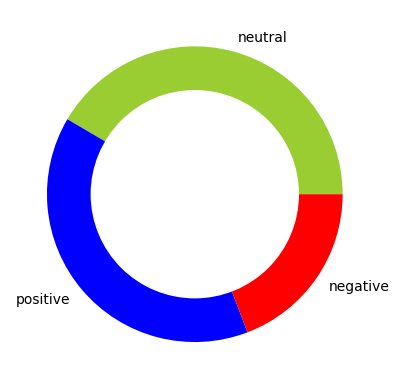

In [13]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
names= pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellowgreen','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()